## Ejemplo 3: Scatterplots por categorías

### 1. Objetivos:
    - Aprender a generar e interpretar scatterplots por categorías
 
---
    
### 2. Desarrollo:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Datasets/athlete_olympic_events-cleann.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
120585,Nadiya Volodymyrivna Tkachenko (-Sapronova),F,23,165,74.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's Pentathlon,None
124576,"Cornelia Maria ""Cocki"" van Engelsdorp Gastelaa...",F,22,170,67.0,Netherlands,NED,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,None
88962,"Gunhild Margareta ""Gun"" Olsson (-Eriksson)",F,26,166,57.0,Sweden,SWE,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's 4 x 100 metres Relay,None
82254,Jason Newth Morris,M,25,178,80.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Judo,Judo Men's Half-Middleweight,Silver
106442,Carlos A. Scanavino Villavicenio,M,24,187,80.0,Uruguay,URU,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 200 metres Freestyle,None


In [3]:
df_grouped = df.groupby('name')[['height', 'weight', 'sex', 'team', 'sport']].max()

In [4]:
# Me quedo sólo con los de China

china = df_grouped[df_grouped['team'] == 'China']

He aquí una gráfica de dispersión para observar la relación entre las variables 'weight' y 'height' de los atletas chinos que han participado en Olimpiadas:

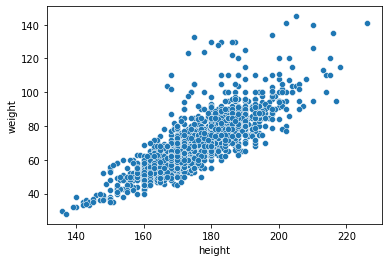

In [6]:
# Diagrama de dispersión del equipo de China

sns.scatterplot(x=china['height'], y=china['weight']);

Si queremos hacer una visualización comparativa entre los atletas hombres y mujeres de nuestro dataset de China, podemos entonces colorear nuestros puntos de acuerdo a la variable 'sex':

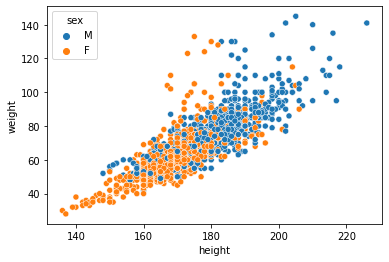

In [7]:
# agregamos el parámetro hue
sns.scatterplot(x=china['height'], y=china['weight'], hue=china['sex']);

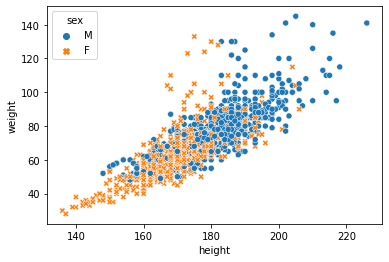

In [8]:
# agregamos el parámetro style (para cambial la forma de los puntos)

sns.scatterplot(x=china['height'], y=china['weight'], hue=china['sex'], style=china['sex']);

Esta gráfica nos hace ver con mucha claridad que sí hay una diferencia cuantificable entre los pesos y alturas de atletas masculinos y femeninos. También genera preguntas interesantes. Por ejemplo: ¿qué deporte realizan las atletas mujeres que tienen pesos cercanos al peso máximo?

In [9]:
china2 = china[(china['sex'] == 'F') & (china['weight'] > 120)]

¡Como era de esperarse, los pesos pesados entre las atletas mujeres de China hacen practican alterofilia y judo!

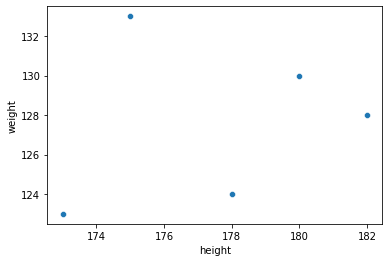

In [10]:
sns.scatterplot(x=china2['height'], y=china2['weight']);